## Analysis of the entire corpus

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score,precision_score, recall_score

In [2]:
corpus = pd.read_csv("Macocu-sl-en-predicted.csv", sep = "\t", index_col = 0)
corpus.head(3)

,biroamer_entities,translation_direction,en_source,en_var_doc,en_var_dom,sl_source,en_domain,sl_domain,average_score,en_doc,sl_doc,en_length,sl_length,punct_ratio,X-GENRE,label_distribution,chosen_category_distr
2584979,No,sl-orig,http://15.liffe.si/?lang_chg=en,B,B,http://15.liffe.si/?lang_chg=sl,15.liffe.si,15.liffe.si,0.936808,It went out with a bang. The evening sparkled ...,Končalo se je razburljivo in z razkošjem. Veče...,574,463,0.103501,Opinion/Argumentation,"{'Other': 0.0003, 'Information/Explanation': 0...",0.988794
1212933,No,sl-orig,http://16.liffe.si/?lang_chg=en,B,B,http://16.liffe.si/index.php?menu_item=domov,16.liffe.si,16.liffe.si,0.900000,Some days ago the organisers of the 17th Liffe...,Pred dnevi smo se iz 59. mednarodnega filmskeg...,293,184,0.076220,News,"{'Other': 0.0009, 'Information/Explanation': 0...",0.961600
598330,Yes,sl-orig,http://17.liffe.si/?lang_chg=en,B,B,http://17.liffe.si/?lang_chg=sl,17.liffe.si,17.liffe.si,0.957875,17th LIFFe was brought to an end with the best...,S podelitvijo nagrad in predvajanjem Režiserja...,445,418,0.073930,News,"{'Other': 0.0001, 'Information/Explanation': 0...",0.997264


In [5]:
print(corpus["X-GENRE"].value_counts(normalize=True).to_markdown())

|                         |    X-GENRE |
|:------------------------|-----------:|
| Information/Explanation | 0.317935   |
| Promotion               | 0.30827    |
| News                    | 0.133635   |
| Instruction             | 0.106535   |
| Legal                   | 0.0576188  |
| Opinion/Argumentation   | 0.0477669  |
| Other                   | 0.0215506  |
| Forum                   | 0.00397812 |
| Prose/Lyrical           | 0.00271101 |


In [6]:
print(corpus["chosen_category_distr"].describe().to_markdown())

|       |   chosen_category_distr |
|:------|------------------------:|
| count |           101807        |
| mean  |                0.970066 |
| std   |                0.089027 |
| min   |                0.247184 |
| 25%   |                0.995622 |
| 50%   |                0.998666 |
| 75%   |                0.998966 |
| max   |                0.999145 |


In [17]:
corpus[corpus["label_distribution"] < 0.3]["X-GENRE"].to_list()

['Forum', 'Other', 'Legal', 'Information/Explanation', 'Promotion']

In [16]:
corpus[corpus["label_distribution"] < 0.3].en_doc.to_list()

['Student is part of DIR organizing student team, which starts with event organisation at the beginning of November. In the following step, the student and team are searching for matching industrial partners having available adequate industrial robots. In year 2015 offered their cooperation 17 industrial partners. After that student prepares all surrounding hardware, sensors and programs for all applications/robots. At the end of february are oppened registrations for the second group of students. Registrations are meant for any other student (who is not subject of this syllabus), who would at selected time have the prepared application available only for him. Nonregistered students and other younger or older visitors are welcome only for observation. The syllabus for student is in addition to complete preparison of robot application and cooperation with industry also including promotion of event in electronic and printed media, as well three day, full day demonstration in the week of 

In [12]:
LABELS = list(corpus["X-GENRE"].unique())
print(LABELS)

['Opinion/Argumentation', 'News', 'Promotion', 'Legal', 'Information/Explanation', 'Other', 'Instruction', 'Prose/Lyrical', 'Forum']


In [8]:
for i in LABELS:
    print(i)
    filtered_corpus = corpus[corpus["X-GENRE"] == i]
    print(filtered_corpus["en_var_doc"].value_counts(normalize="True").to_markdown())

Opinion/Argumentation
|     |   en_var_doc |
|:----|-------------:|
| B   |    0.432243  |
| UNK |    0.335801  |
| A   |    0.167386  |
| MIX |    0.0645692 |
News
|     |   en_var_doc |
|:----|-------------:|
| B   |    0.550533  |
| UNK |    0.312165  |
| A   |    0.092025  |
| MIX |    0.0452775 |
Promotion
|     |   en_var_doc |
|:----|-------------:|
| B   |    0.355404  |
| UNK |    0.345017  |
| A   |    0.22212   |
| MIX |    0.0774599 |
Legal
|     |   en_var_doc |
|:----|-------------:|
| B   |    0.678145  |
| UNK |    0.223491  |
| A   |    0.062223  |
| MIX |    0.0361405 |
Information/Explanation
|     |   en_var_doc |
|:----|-------------:|
| B   |    0.433329  |
| UNK |    0.35912   |
| A   |    0.144186  |
| MIX |    0.0633651 |
Other
|     |   en_var_doc |
|:----|-------------:|
| B   |    0.461258  |
| UNK |    0.309936  |
| A   |    0.153601  |
| MIX |    0.0752051 |
Instruction
|     |   en_var_doc |
|:----|-------------:|
| UNK |    0.479071  |
| B   |    0.27180

## Manual analysis of a sample

### Creation of the sample

In [9]:
# Create a sample corpus for manual inspection where the labels are stratified

from sklearn.model_selection import train_test_split
rest, sample = train_test_split(corpus, test_size=100, random_state=42, shuffle = True, stratify = corpus["X-GENRE"])

sample

,biroamer_entities,translation_direction,en_source,en_var_doc,en_var_dom,sl_source,en_domain,sl_domain,average_score,en_doc,sl_doc,en_length,sl_length,punct_ratio,X-GENRE,label_distribution,chosen_category_distr
3118013,No,sl-orig,http://galerijalkatraz.org/?p=11500,MIX,B,http://galerijalkatraz.org/?p=11451,galerijalkatraz.org,galerijalkatraz.org,0.922638,20 May 2016 &gt; 23 May 2016 Kindly invited to...,Maj 2016 &gt; 23 Maj 2016 Vljudno vabljeni na ...,1022,682,0.095557,Other,"{'Other': 0.9023, 'Information/Explanation': 0...",0.902287
1999145,No,sl-orig,https://cor.europa.eu/en/news/Pages/Bringing-E...,B,B,https://cor.europa.eu/sl/news/Pages/bringing-e...,cor.europa.eu,cor.europa.eu,0.932378,1) Rethink the EU democratic model to better r...,Evropski odbor regij (OR) je 2. julija sprejel...,955,940,0.081323,News,"{'Other': 0.0122, 'Information/Explanation': 0...",0.607548
2021958,No,sl-orig,https://www.turistica.si/en/news/brezplacna-ce...,B,B,https://www.turistica.si/si/novice/brezplacna-...,turistica.si,turistica.si,0.795667,The course was prepared in frame of a network-...,Tečaja je pripravila UNESCO-va mreža 10 univer...,165,116,0.106061,Other,"{'Other': 0.9902, 'Information/Explanation': 0...",0.990174
2435571,Yes,sl-orig,http://ricinus2.mf.uni-lj.si/BS/neva.exe?name=...,MIX,MIX,http://ricinus2.mf.uni-lj.si/BS/neva.exe?n=bs_...,ricinus2.mf.uni-lj.si,ricinus2.mf.uni-lj.si,0.838000,Vogt Guenter; Štrus Jasna Hypogean life-style ...,Žust J; Klemenc N; Vospernik P; Pestevšek U; V...,250,149,0.024911,Information/Explanation,"{'Other': 0.0001, 'Information/Explanation': 0...",0.999114
1057034,No,sl-orig,https://dk.um.si/Iskanje.php?type=napredno&amp...,B,MIX,https://dk.um.si/Iskanje.php?type=napredno&amp...,dk.um.si,dk.um.si,0.767476,"Furthermore, the results from cellulose and su...",Za določitev uporabnosti metode izolacije iz p...,386,151,0.085653,Information/Explanation,"{'Other': 0.0001, 'Information/Explanation': 0...",0.999091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558752,No,sl-orig,https://eur-lex.europa.eu/legal-content/en/ALL...,B,B,https://eur-lex.europa.eu/legal-content/SL/TXT...,eur-lex.europa.eu,eur-lex.europa.eu,0.790200,"HAS ADOPTED THIS REGULATION: CHAPTER I SCOPE, ...","Zlasti je pomembno, da se Komisija pri svojem ...",104,6772,0.050000,Legal,"{'Other': 0.0003, 'Information/Explanation': 0...",0.997087
1841516,No,sl-orig,http://www.drustvo-mknz.si/waawe1.html,UNK,MIX,http://www.drustvo-mknz.si/waawe.html,drustvo-mknz.si,drustvo-mknz.si,0.963667,"Waawe are from Tabor, in the southern Czech Re...",Waawe prihajajo iz Tabora na jugu Češke. Skupi...,191,170,0.132780,Information/Explanation,"{'Other': 0.0001, 'Information/Explanation': 0...",0.999114
1789650,No,sl-orig,https://odeja.si/en/collections/bedlinen-alleg...,B,B,https://odeja.si/slo/kolekcija/posteljnina-all...,odeja.si,odeja.si,0.939143,The bed cover is made from high-quality cotton...,Pregrinjalo za posteljo je izdelano iz vrhunsk...,179,110,0.098131,Promotion,"{'Other': 0.0002, 'Information/Explanation': 0...",0.999010
854977,No,sl-orig,https://bsf.si/en/movie/mesto-svetlobe/,UNK,B,https://bsf.si/sl/film/mesto-svetlobe/,bsf.si,bsf.si,0.889750,City of Light A well-established writer fights...,Mesto svetlobe Uveljavljen pisatelj se bori z ...,87,71,0.090000,Opinion/Argumentation,"{'Other': 0.0002, 'Information/Explanation': 0...",0.997819


In [10]:
# Analyze label distribution
sample["X-GENRE"].value_counts()

Information/Explanation    32
Promotion                  31
News                       13
Instruction                11
Legal                       6
Opinion/Argumentation       5
Other                       2
Name: X-GENRE, dtype: int64

In [14]:
# Add to the sample instances of underrepresented labels so that each has at least 10 instances
final_sample = sample

for i in ['Opinion/Argumentation', 'Legal',  'Other', 'Prose/Lyrical', 'Forum']:
	added_instances = corpus[corpus["X-GENRE"] == i].sample(n=10)
	final_sample = pd.concat([final_sample, added_instances])

In [17]:
final_sample.shape

(150, 17)

In [16]:
# Drop any duplicates
final_sample = final_sample.drop_duplicates()

In [18]:
final_sample["X-GENRE"].value_counts()

Information/Explanation    32
Promotion                  31
Legal                      16
Opinion/Argumentation      15
News                       13
Other                      12
Instruction                11
Prose/Lyrical              10
Forum                      10
Name: X-GENRE, dtype: int64

In [21]:
# Shuffle the instances
from sklearn.utils import shuffle
final_sample = shuffle(final_sample)

final_sample.tail()

,biroamer_entities,translation_direction,en_source,en_var_doc,en_var_dom,sl_source,en_domain,sl_domain,average_score,en_doc,sl_doc,en_length,sl_length,punct_ratio,X-GENRE,label_distribution,chosen_category_distr
1999303,No,sl-orig,https://mgml.si/en/city-art-gallery/events/arc...,B,B,https://mgml.si/sl/dogodki/arhiv/2015/,mgml.si,mgml.si,0.879944,"Exhibition deals with laughter, a continuation...","Tokratna razstava se posveča tematiki smeha, k...",530,430,0.074074,Promotion,"{'Other': 0.01, 'Information/Explanation': 0.0...",0.987622
1819059,No,sl-orig,https://www.goopti.com/en/about/goopti_blog/ad...,MIX,MIX,https://www.goopti.com/sl/o-goopti/goopti-blog...,goopti.com,goopti.com,0.934722,Mostly I'm attracted to warm places with a 'Me...,Najbolj me privlačijo toplejši kraji z 'medite...,559,490,0.097179,Forum,"{'Other': 0.0008, 'Information/Explanation': 0...",0.997394
369763,No,sl-orig,https://bsf.si/en/movie/rezine-casa/,UNK,B,https://bsf.si/sl/film/rezine-casa/,bsf.si,bsf.si,0.978000,Two women were born during the First World War...,Obe ženski sta se rodili med prvo svetovno voj...,75,72,0.087912,Opinion/Argumentation,"{'Other': 0.012, 'Information/Explanation': 0....",0.867477
3139071,No,sl-orig,https://lifeslovenija.si/en/may-and-june-reser...,A,B,https://lifeslovenija.si/maj-v-znamenju-life-d...,lifeslovenija.si,lifeslovenija.si,0.925920,We started May with the second LIFE writer’s w...,Maj smo začeli z drugo LIFE delavnico za pripr...,438,361,0.100592,News,"{'Other': 0.0001, 'Information/Explanation': 0...",0.997997
2021958,No,sl-orig,https://www.turistica.si/en/news/brezplacna-ce...,B,B,https://www.turistica.si/si/novice/brezplacna-...,turistica.si,turistica.si,0.795667,The course was prepared in frame of a network-...,Tečaja je pripravila UNESCO-va mreža 10 univer...,165,116,0.106061,Other,"{'Other': 0.9902, 'Information/Explanation': 0...",0.990174


In [22]:
# Save the final sample to CSV
final_sample.to_csv("MaCoCu-sl-en-predicted-sample-manual-analysis.csv", sep = "\t")

### Analysis of the sample with manual annotation added

In [101]:
# Open the file
final_sample = pd.read_csv("MaCoCu-sl-en-data/MaCoCu-sl-en-predicted-sample-manual-analysis.csv", sep = "\t", index_col = 0)

final_sample.head()

,biroamer_entities,translation_direction,en_source,en_var_doc,en_var_dom,sl_source,en_domain,sl_domain,average_score,en_doc,sl_doc,en_length,sl_length,punct_ratio,X-GENRE,label_distribution,chosen_category_distr,manual_annotation,comments
2472949,No,sl-orig,https://ec.europa.eu/clima/consultations/artic...,B,B,https://ec.europa.eu/clima/consultations/impac...,ec.europa.eu,ec.europa.eu,0.837000,Reducing CO2 emissions from road vehicles This...,Standardi za emisije CO2 iz težkih gospodarski...,155,294,0.054878,Legal,"{'Other': 0.0012, 'Information/Explanation': 0...",0.978639,News,NaN
2761820,No,sl-orig,http://www.eu2008.si/en/News_and_Documents/Spe...,B,B,http://www.eu2008.si/si/News_and_Documents/Spe...,eu2008.si,eu2008.si,0.945333,The Council of the European Union has not disc...,O vzpostavitvi protiraketnega ščita Združenih ...,135,106,0.056962,Other,"{'Other': 0.9646, 'Information/Explanation': 0...",0.964623,Opinion/Argumentation,NaN
596509,Yes,sl-orig,https://www.europarl.europa.eu/doceo/document/...,B,B,https://www.europarl.europa.eu/doceo/document/...,europarl.europa.eu,europarl.europa.eu,0.786571,European Parliament resolution of 25 October 2...,"Inovacije, raziskave in izobraževanje – ob upo...",134,634,0.033520,Legal,"{'Other': 0.0015, 'Information/Explanation': 0...",0.972433,Legal,NaN
190173,No,sl-orig,https://www.privacy-regulation.eu/en/r141.htm,UNK,B,https://www.privacy-regulation.eu/sl/r141.htm,privacy-regulation.eu,privacy-regulation.eu,0.988000,(141) Every data subject should have the right...,"(141) Vsak posameznik, na katerega se nanašajo...",96,82,0.039216,Legal,"{'Other': 0.0003, 'Information/Explanation': 0...",0.997140,Legal,NaN
2343600,No,sl-orig,https://www.rra-zk.si/en/main-activities/tourism/,B,B,https://www.rra-zk.si/podrocja-delovanja/turizem,rra-zk.si,rra-zk.si,0.856500,"In the field of tourism, we are pursuing the f...",Na področju turizma sledimo naslednjim usmerit...,188,148,0.065421,Other,"{'Other': 0.8184, 'Information/Explanation': 0...",0.818389,Opinion/Argumentation,NaN


In [72]:
final_sample.shape

(150, 19)

In [41]:
# Add a column about corectness of the prediction
final_sample["correct_prediction"] = np.where((final_sample["X-GENRE"] == final_sample["manual_annotation"]), "y", "n")
final_sample.head()

,biroamer_entities,translation_direction,en_source,en_var_doc,en_var_dom,sl_source,en_domain,sl_domain,average_score,en_doc,sl_doc,en_length,sl_length,punct_ratio,X-GENRE,label_distribution,chosen_category_distr,manual_annotation,comments,correct_prediction
2472949,No,sl-orig,https://ec.europa.eu/clima/consultations/artic...,B,B,https://ec.europa.eu/clima/consultations/impac...,ec.europa.eu,ec.europa.eu,0.837000,Reducing CO2 emissions from road vehicles This...,Standardi za emisije CO2 iz težkih gospodarski...,155,294,0.054878,Legal,"{'Other': 0.0012, 'Information/Explanation': 0...",0.978639,News,NaN,n
2761820,No,sl-orig,http://www.eu2008.si/en/News_and_Documents/Spe...,B,B,http://www.eu2008.si/si/News_and_Documents/Spe...,eu2008.si,eu2008.si,0.945333,The Council of the European Union has not disc...,O vzpostavitvi protiraketnega ščita Združenih ...,135,106,0.056962,Other,"{'Other': 0.9646, 'Information/Explanation': 0...",0.964623,Opinion/Argumentation,NaN,n
596509,Yes,sl-orig,https://www.europarl.europa.eu/doceo/document/...,B,B,https://www.europarl.europa.eu/doceo/document/...,europarl.europa.eu,europarl.europa.eu,0.786571,European Parliament resolution of 25 October 2...,"Inovacije, raziskave in izobraževanje – ob upo...",134,634,0.033520,Legal,"{'Other': 0.0015, 'Information/Explanation': 0...",0.972433,Legal,NaN,y
190173,No,sl-orig,https://www.privacy-regulation.eu/en/r141.htm,UNK,B,https://www.privacy-regulation.eu/sl/r141.htm,privacy-regulation.eu,privacy-regulation.eu,0.988000,(141) Every data subject should have the right...,"(141) Vsak posameznik, na katerega se nanašajo...",96,82,0.039216,Legal,"{'Other': 0.0003, 'Information/Explanation': 0...",0.997140,Legal,NaN,y
2343600,No,sl-orig,https://www.rra-zk.si/en/main-activities/tourism/,B,B,https://www.rra-zk.si/podrocja-delovanja/turizem,rra-zk.si,rra-zk.si,0.856500,"In the field of tourism, we are pursuing the f...",Na področju turizma sledimo naslednjim usmerit...,188,148,0.065421,Other,"{'Other': 0.8184, 'Information/Explanation': 0...",0.818389,Opinion/Argumentation,NaN,n


In [42]:
print(final_sample["manual_annotation"].value_counts().to_markdown())

|                         |   manual_annotation |
|:------------------------|--------------------:|
| Promotion               |                  37 |
| Information/Explanation |                  35 |
| Opinion/Argumentation   |                  24 |
| News                    |                  16 |
| Legal                   |                  15 |
| Prose/Lyrical           |                   9 |
| Instruction             |                   8 |
| Forum                   |                   3 |
| Non-textual             |                   2 |
| Other                   |                   1 |


In [43]:
# Analyse properties of incorrect predictions
incorrect = final_sample[final_sample["correct_prediction"] == "n"]

incorrect.shape

(35, 20)

In [19]:
incorrect.describe()

,average_score,en_length,sl_length,punct_ratio,chosen_category_distr
count,35.000000,35.000000,35.000000,35.000000,35.000000
mean,0.893787,361.914286,323.314286,0.087518,0.927622
std,0.055365,493.530819,451.365169,0.025442,0.120606
min,0.759049,75.000000,39.000000,0.024911,0.473428
25%,0.863278,141.500000,102.500000,0.068373,0.896970
50%,0.912600,227.000000,168.000000,0.089485,0.989059
75%,0.933147,368.500000,313.500000,0.100000,0.997472
max,0.978000,2905.000000,2587.000000,0.153565,0.999114


In [21]:
# Analyse incorrect if we discard "Other"
incorrect = incorrect[incorrect["X-GENRE"] != "Other"]
incorrect.describe()

,average_score,en_length,sl_length,punct_ratio,chosen_category_distr
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,0.893591,351.333333,340.916667,0.087181,0.943062
std,0.060279,561.624868,520.907813,0.028298,0.103474
min,0.759049,75.000000,54.000000,0.024911,0.634437
25%,0.869179,133.500000,98.500000,0.068882,0.945515
50%,0.914386,238.500000,201.500000,0.088481,0.996209
75%,0.932359,341.750000,298.750000,0.100229,0.997670
max,0.978000,2905.000000,2587.000000,0.153565,0.999114


In [32]:
incorrect[incorrect["chosen_category_distr"] < 0.9].shape

(6, 20)

In [44]:
incorrect[incorrect["manual_annotation"] == "Non-textual"]

,biroamer_entities,translation_direction,en_source,en_var_doc,en_var_dom,sl_source,en_domain,sl_domain,average_score,en_doc,sl_doc,en_length,sl_length,punct_ratio,X-GENRE,label_distribution,chosen_category_distr,manual_annotation,comments,correct_prediction
35209,Yes,sl-orig,http://www.e-arhiv.org/diva/index.php?opt=auth...,B,MIX,http://www.e-arhiv.org/diva/index.php?opt=sear...,e-arhiv.org,e-arhiv.org,0.890176,Apolonija Šušteršič - (Cre)Action Directe (0:1...,Mirko Simić - T.A.N.Z. (00:14:17) Produkcija: ...,410,87,0.153565,Information/Explanation,"{'Other': 0.0001, 'Information/Explanation': 0...",0.999046,Non-textual,NaN,n
2435571,Yes,sl-orig,http://ricinus2.mf.uni-lj.si/BS/neva.exe?name=...,MIX,MIX,http://ricinus2.mf.uni-lj.si/BS/neva.exe?n=bs_...,ricinus2.mf.uni-lj.si,ricinus2.mf.uni-lj.si,0.838000,Vogt Guenter; Štrus Jasna Hypogean life-style ...,Žust J; Klemenc N; Vospernik P; Pestevšek U; V...,250,149,0.024911,Information/Explanation,"{'Other': 0.0001, 'Information/Explanation': 0...",0.999114,Non-textual,NaN,n


In [18]:
correct_df = final_sample[final_sample["correct_prediction"] == "y"]
correct_df.describe()

,average_score,en_length,sl_length,punct_ratio,chosen_category_distr
count,115.000000,115.000000,115.000000,115.000000,115.000000
mean,0.890828,413.652174,437.504348,0.090032,0.980488
std,0.072240,864.725532,963.160563,0.024678,0.059380
min,0.658071,76.000000,3.000000,0.033520,0.607548
25%,0.858450,118.000000,91.000000,0.076023,0.995126
50%,0.913600,194.000000,159.000000,0.088398,0.998279
75%,0.944375,321.500000,294.500000,0.102806,0.998858
max,0.988000,6495.000000,6772.000000,0.173228,0.999131


In [33]:
correct_df[correct_df["chosen_category_distr"] < 0.9].shape

(6, 20)

In [102]:
# Remove non-textual
final_sample = final_sample[final_sample["manual_annotation"] != "Non-textual"]
final_sample.shape

(148, 19)

Macro f1: 0.713, Micro f1: 0.777


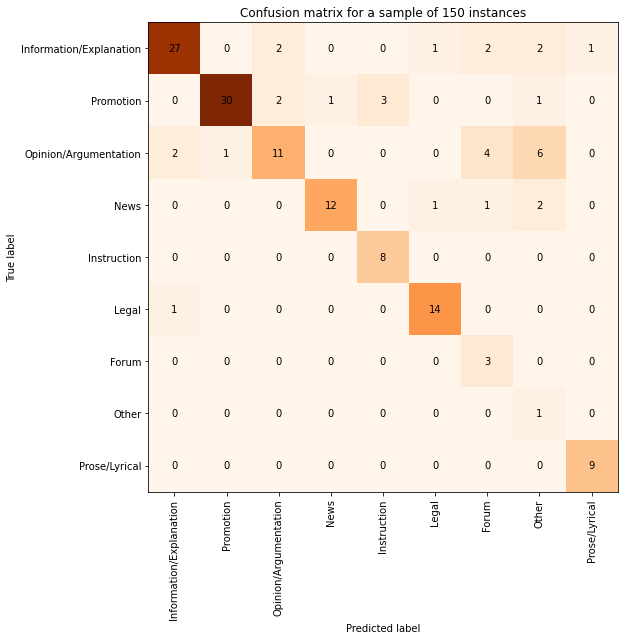

                         precision    recall  f1-score   support

Information/Explanation       0.90      0.77      0.83        35
              Promotion       0.97      0.81      0.88        37
  Opinion/Argumentation       0.73      0.46      0.56        24
                   News       0.92      0.75      0.83        16
            Instruction       0.73      1.00      0.84         8
                  Legal       0.88      0.93      0.90        15
                  Forum       0.30      1.00      0.46         3
                  Other       0.08      1.00      0.15         1
          Prose/Lyrical       0.90      1.00      0.95         9

               accuracy                           0.78       148
              macro avg       0.71      0.86      0.71       148
           weighted avg       0.86      0.78      0.80       148



<Figure size 432x288 with 0 Axes>

In [7]:
LABELS = ['Information/Explanation', 'Promotion', 'Opinion/Argumentation', 'News', 'Instruction', 'Legal', 'Forum', 'Other', "Prose/Lyrical"]

# Analyse results
y_true = final_sample["manual_annotation"].to_list()
y_pred = final_sample["X-GENRE"].to_list()

# Calculate the scores
macro = f1_score(y_true, y_pred, labels=LABELS, average="macro")
micro = f1_score(y_true, y_pred, labels=LABELS,  average="micro")

print(f"Macro f1: {macro:0.3}, Micro f1: {micro:0.3}")

# Plot the confusion matrix:
cm = confusion_matrix(y_true, y_pred, labels=LABELS)
plt.figure(figsize=(9, 9))
plt.imshow(cm, cmap="Oranges")
for (i, j), z in np.ndenumerate(cm):
	plt.text(j, i, '{:d}'.format(z), ha='center', va='center')
classNames = LABELS
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=90)
plt.yticks(tick_marks, classNames)
plt.title(f"Confusion matrix for a sample of 150 instances")

plt.tight_layout()
fig1 = plt.gcf()
plt.show()
plt.draw()
# Save the confusion matrix
fig1.savefig(f"Confusion-matrix-predicted-sample-150-instances-second-round.png",dpi=100)

# Print classification report
print(classification_report(y_true, y_pred, labels = LABELS))

### Results on a stratified sample

In [12]:
# Let's analyze what would the scores be on a stratified sample

# Drop Legal to 6, Opinion to 5, Other to 2, all Prose/Lyrical, all Forum

stratified_sample = final_sample.drop(final_sample[final_sample["X-GENRE"] == "Forum"].sample(n = 10).index)

stratified_sample = stratified_sample.drop(stratified_sample[stratified_sample["X-GENRE"] == "Prose/Lyrical"].sample(n = 10).index)

stratified_sample = stratified_sample.drop(stratified_sample[stratified_sample["X-GENRE"] == "Other"].sample(n = 10).index)

stratified_sample = stratified_sample.drop(stratified_sample[stratified_sample["X-GENRE"] == "Opinion/Argumentation"].sample(n = 10).index)

stratified_sample = stratified_sample.drop(stratified_sample[stratified_sample["X-GENRE"] == "Legal"].sample(n = 10).index)

stratified_sample["X-GENRE"].value_counts()

Promotion                  31
Information/Explanation    30
News                       13
Instruction                11
Legal                       6
Opinion/Argumentation       5
Other                       2
Name: X-GENRE, dtype: int64

Macro f1: 0.71, Micro f1: 0.867


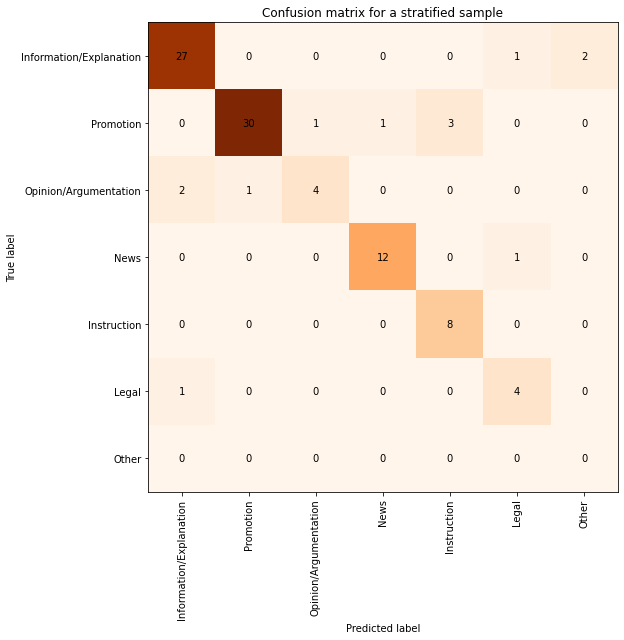

                         precision    recall  f1-score   support

Information/Explanation       0.90      0.90      0.90        30
              Promotion       0.97      0.86      0.91        35
  Opinion/Argumentation       0.80      0.57      0.67         7
                   News       0.92      0.92      0.92        13
            Instruction       0.73      1.00      0.84         8
                  Legal       0.67      0.80      0.73         5
                  Other       0.00      0.00      0.00         0

               accuracy                           0.87        98
              macro avg       0.71      0.72      0.71        98
           weighted avg       0.89      0.87      0.88        98



/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 432x288 with 0 Axes>

In [13]:
LABELS = ['Information/Explanation', 'Promotion', 'Opinion/Argumentation', 'News', 'Instruction', 'Legal', 'Other']

# Analyse results
y_true = stratified_sample["manual_annotation"].to_list()
y_pred = stratified_sample["X-GENRE"].to_list()

# Calculate the scores
macro = f1_score(y_true, y_pred, labels=LABELS, average="macro")
micro = f1_score(y_true, y_pred, labels=LABELS,  average="micro")

print(f"Macro f1: {macro:0.3}, Micro f1: {micro:0.3}")

# Plot the confusion matrix:
cm = confusion_matrix(y_true, y_pred, labels=LABELS)
plt.figure(figsize=(9, 9))
plt.imshow(cm, cmap="Oranges")
for (i, j), z in np.ndenumerate(cm):
	plt.text(j, i, '{:d}'.format(z), ha='center', va='center')
classNames = LABELS
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=90)
plt.yticks(tick_marks, classNames)
plt.title(f"Confusion matrix for a stratified sample")

plt.tight_layout()
fig1 = plt.gcf()
plt.show()
plt.draw()
# Save the confusion matrix
fig1.savefig(f"Confusion-matrix-predicted-stratified-sample-second-round.png",dpi=100)

# Print classification report
print(classification_report(y_true, y_pred, labels = LABELS))

### Analyse results after cleaning the predictions

For final version of the data, I suggest discarding predicted labels if:
- the predicted label is "Other"
- the certainty of prediction is less than 0.9

In [83]:
# Remove Other
cleaned_sample = final_sample[final_sample["X-GENRE"] != "Other"]
cleaned_sample.shape

(136, 19)

In [84]:
# Remove instances with prediction certainty less than 0.9
cleaned_sample = cleaned_sample[cleaned_sample["chosen_category_distr"] > 0.9]
cleaned_sample.shape

(124, 19)

In [85]:
cleaned_sample["X-GENRE"].value_counts()

Information/Explanation    30
Promotion                  30
Legal                      15
News                       11
Opinion/Argumentation      11
Instruction                10
Forum                       9
Prose/Lyrical               8
Name: X-GENRE, dtype: int64

Macro f1: 0.827, Micro f1: 0.871


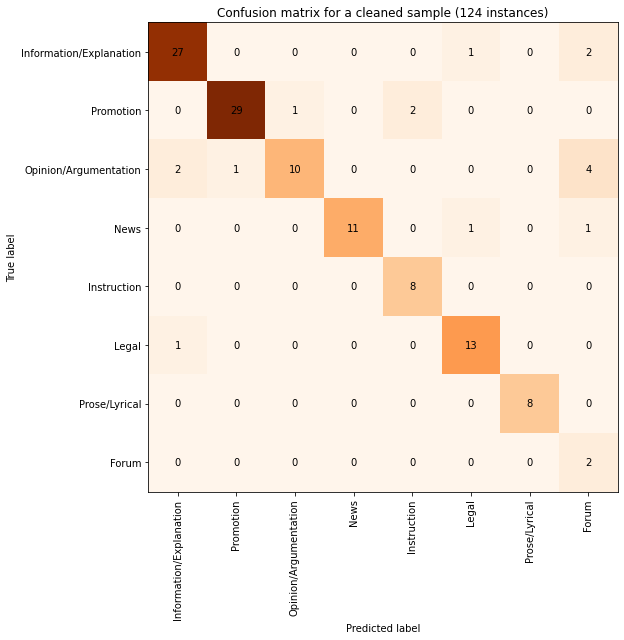

                         precision    recall  f1-score   support

Information/Explanation       0.90      0.90      0.90        30
              Promotion       0.97      0.91      0.94        32
  Opinion/Argumentation       0.91      0.59      0.71        17
                   News       1.00      0.85      0.92        13
            Instruction       0.80      1.00      0.89         8
                  Legal       0.87      0.93      0.90        14
          Prose/Lyrical       1.00      1.00      1.00         8
                  Forum       0.22      1.00      0.36         2

               accuracy                           0.87       124
              macro avg       0.83      0.90      0.83       124
           weighted avg       0.91      0.87      0.88       124



<Figure size 432x288 with 0 Axes>

In [86]:
LABELS = ['Information/Explanation', 'Promotion', 'Opinion/Argumentation', 'News', 'Instruction', 'Legal', "Prose/Lyrical", "Forum"]

# Analyse results
y_true = cleaned_sample["manual_annotation"].to_list()
y_pred = cleaned_sample["X-GENRE"].to_list()

# Calculate the scores
macro = f1_score(y_true, y_pred, labels=LABELS, average="macro")
micro = f1_score(y_true, y_pred, labels=LABELS,  average="micro")

print(f"Macro f1: {macro:0.3}, Micro f1: {micro:0.3}")

# Plot the confusion matrix:
cm = confusion_matrix(y_true, y_pred, labels=LABELS)
plt.figure(figsize=(9, 9))
plt.imshow(cm, cmap="Oranges")
for (i, j), z in np.ndenumerate(cm):
	plt.text(j, i, '{:d}'.format(z), ha='center', va='center')
classNames = LABELS
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=90)
plt.yticks(tick_marks, classNames)
plt.title(f"Confusion matrix for a cleaned sample (124 instances)")

plt.tight_layout()
fig1 = plt.gcf()
plt.show()
plt.draw()
# Save the confusion matrix
fig1.savefig(f"Confusion-matrix-predicted-sample-cleaned-124-instances-second-round.png",dpi=100)

# Print classification report
print(classification_report(y_true, y_pred, labels = LABELS))

In [87]:
cleaned_sample["X-GENRE"].value_counts()

Information/Explanation    30
Promotion                  30
Legal                      15
News                       11
Opinion/Argumentation      11
Instruction                10
Forum                       9
Prose/Lyrical               8
Name: X-GENRE, dtype: int64

In [90]:
# Results on a balanced sample (stratified based on labels)

# Drop Legal to 6, Opinion to 5, Other to 2, all Prose/Lyrical, all Forum

stratified_sample = cleaned_sample.drop(cleaned_sample[cleaned_sample["X-GENRE"] == "Forum"].sample(n = 9).index)

stratified_sample = stratified_sample.drop(stratified_sample[stratified_sample["X-GENRE"] == "Prose/Lyrical"].sample(n = 8).index)

stratified_sample = stratified_sample.drop(stratified_sample[stratified_sample["X-GENRE"] == "Opinion/Argumentation"].sample(n = 6).index)

stratified_sample = stratified_sample.drop(stratified_sample[stratified_sample["X-GENRE"] == "Legal"].sample(n = 9).index)

stratified_sample["X-GENRE"].value_counts()

Information/Explanation    30
Promotion                  30
News                       11
Instruction                10
Legal                       6
Opinion/Argumentation       5
Name: X-GENRE, dtype: int64

Macro f1: 0.851, Micro f1: 0.902


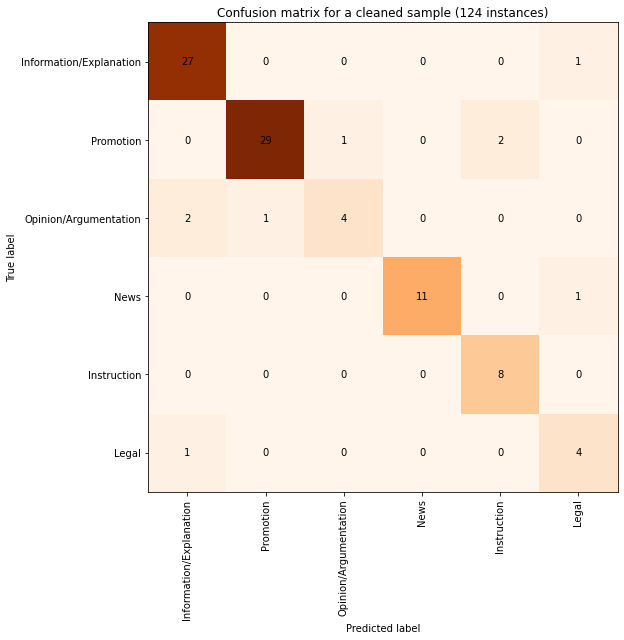

                         precision    recall  f1-score   support

Information/Explanation       0.90      0.96      0.93        28
              Promotion       0.97      0.91      0.94        32
  Opinion/Argumentation       0.80      0.57      0.67         7
                   News       1.00      0.92      0.96        12
            Instruction       0.80      1.00      0.89         8
                  Legal       0.67      0.80      0.73         5

               accuracy                           0.90        92
              macro avg       0.86      0.86      0.85        92
           weighted avg       0.91      0.90      0.90        92



<Figure size 432x288 with 0 Axes>

In [91]:
LABELS = ['Information/Explanation', 'Promotion', 'Opinion/Argumentation', 'News', 'Instruction', 'Legal']

# Analyse results
y_true = stratified_sample["manual_annotation"].to_list()
y_pred = stratified_sample["X-GENRE"].to_list()

# Calculate the scores
macro = f1_score(y_true, y_pred, labels=LABELS, average="macro")
micro = f1_score(y_true, y_pred, labels=LABELS,  average="micro")

print(f"Macro f1: {macro:0.3}, Micro f1: {micro:0.3}")

# Plot the confusion matrix:
cm = confusion_matrix(y_true, y_pred, labels=LABELS)
plt.figure(figsize=(9, 9))
plt.imshow(cm, cmap="Oranges")
for (i, j), z in np.ndenumerate(cm):
	plt.text(j, i, '{:d}'.format(z), ha='center', va='center')
classNames = LABELS
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=90)
plt.yticks(tick_marks, classNames)
plt.title(f"Confusion matrix for a cleaned sample (124 instances)")

plt.tight_layout()
fig1 = plt.gcf()
plt.show()
plt.draw()
# Save the confusion matrix
fig1.savefig(f"Confusion-matrix-predicted-sample-cleaned-124-instances-second-round.png",dpi=100)

# Print classification report
print(classification_report(y_true, y_pred, labels = LABELS))

### Analysis after discarding also "Forum"

In [103]:
# Remove Other
cleaned_sample = final_sample[final_sample["X-GENRE"] != "Other"]

# Remove Forum

cleaned_sample = cleaned_sample[cleaned_sample["X-GENRE"] != "Forum"]

# Remove instances with prediction certainty less than 0.9
cleaned_sample = cleaned_sample[cleaned_sample["chosen_category_distr"] > 0.9]
cleaned_sample.shape

(115, 19)

In [77]:
cleaned_sample["X-GENRE"].value_counts()

Information/Explanation    30
Promotion                  30
Legal                      15
News                       11
Opinion/Argumentation      11
Instruction                10
Prose/Lyrical               8
Name: X-GENRE, dtype: int64

Macro f1: 0.92, Micro f1: 0.922


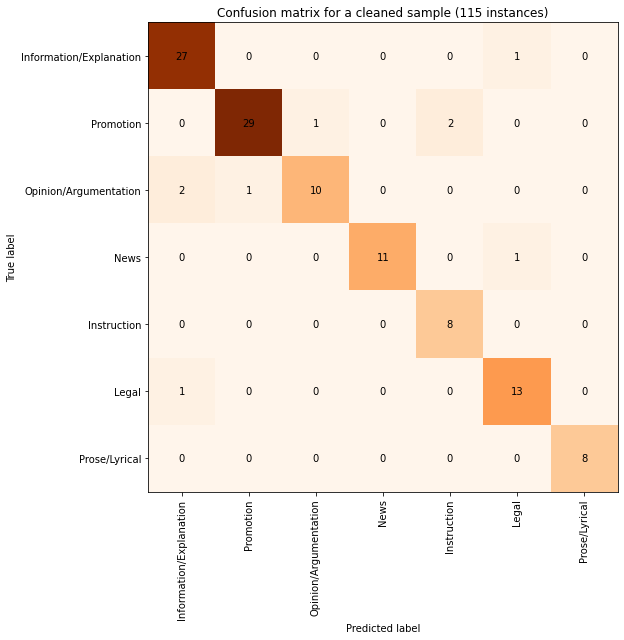

                         precision    recall  f1-score   support

Information/Explanation       0.90      0.96      0.93        28
              Promotion       0.97      0.91      0.94        32
  Opinion/Argumentation       0.91      0.77      0.83        13
                   News       1.00      0.92      0.96        12
            Instruction       0.80      1.00      0.89         8
                  Legal       0.87      0.93      0.90        14
          Prose/Lyrical       1.00      1.00      1.00         8

               accuracy                           0.92       115
              macro avg       0.92      0.93      0.92       115
           weighted avg       0.93      0.92      0.92       115



<Figure size 432x288 with 0 Axes>

In [127]:
LABELS = ['Information/Explanation', 'Promotion', 'Opinion/Argumentation', 'News', 'Instruction', 'Legal', "Prose/Lyrical"]

# Analyse results
y_true = cleaned_sample["manual_annotation"].to_list()
y_pred = cleaned_sample["X-GENRE"].to_list()

# Calculate the scores
macro = f1_score(y_true, y_pred, labels=LABELS, average="macro")
micro = f1_score(y_true, y_pred, labels=LABELS,  average="micro")

print(f"Macro f1: {macro:0.3}, Micro f1: {micro:0.3}")

# Plot the confusion matrix:
cm = confusion_matrix(y_true, y_pred, labels=LABELS)
plt.figure(figsize=(9, 9))
plt.imshow(cm, cmap="Oranges")
for (i, j), z in np.ndenumerate(cm):
	plt.text(j, i, '{:d}'.format(z), ha='center', va='center')
classNames = LABELS
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=90)
plt.yticks(tick_marks, classNames)
plt.title(f"Confusion matrix for a cleaned sample (115 instances)")

plt.tight_layout()
fig1 = plt.gcf()
plt.show()
plt.draw()
# Save the confusion matrix
fig1.savefig(f"Confusion-matrix-predicted-sample-cleaned-115-instances-second-round.png",dpi=100)

# Print classification report
print(classification_report(y_true, y_pred, labels = LABELS))

In [128]:
# Results on a balanced sample (stratified based on labels)

# Drop Legal to 6, Opinion to 5, Other to 2, all Prose/Lyrical, all Forum

stratified_sample = cleaned_sample.drop(cleaned_sample[cleaned_sample["X-GENRE"] == "Prose/Lyrical"].sample(n = 8).index)

stratified_sample = stratified_sample.drop(stratified_sample[stratified_sample["X-GENRE"] == "Opinion/Argumentation"].sample(n = 6).index)

stratified_sample = stratified_sample.drop(stratified_sample[stratified_sample["X-GENRE"] == "Legal"].sample(n = 9).index)

stratified_sample["X-GENRE"].value_counts()

Information/Explanation    30
Promotion                  30
News                       11
Instruction                10
Legal                       6
Opinion/Argumentation       5
Name: X-GENRE, dtype: int64

In [129]:
stratified_sample.shape

(92, 19)

Macro f1: 0.896, Micro f1: 0.924


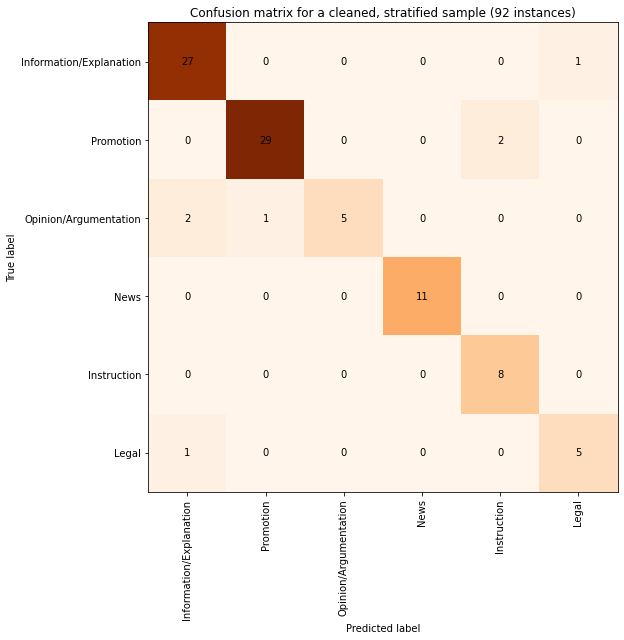

                         precision    recall  f1-score   support

Information/Explanation       0.90      0.96      0.93        28
              Promotion       0.97      0.94      0.95        31
  Opinion/Argumentation       1.00      0.62      0.77         8
                   News       1.00      1.00      1.00        11
            Instruction       0.80      1.00      0.89         8
                  Legal       0.83      0.83      0.83         6

               accuracy                           0.92        92
              macro avg       0.92      0.89      0.90        92
           weighted avg       0.93      0.92      0.92        92



<Figure size 432x288 with 0 Axes>

In [131]:
LABELS = ['Information/Explanation', 'Promotion', 'Opinion/Argumentation', 'News', 'Instruction', 'Legal']

# Analyse results
y_true = stratified_sample["manual_annotation"].to_list()
y_pred = stratified_sample["X-GENRE"].to_list()

# Calculate the scores
macro = f1_score(y_true, y_pred, labels=LABELS, average="macro")
micro = f1_score(y_true, y_pred, labels=LABELS,  average="micro")

print(f"Macro f1: {macro:0.3}, Micro f1: {micro:0.3}")

# Plot the confusion matrix:
cm = confusion_matrix(y_true, y_pred, labels=LABELS)
plt.figure(figsize=(9, 9))
plt.imshow(cm, cmap="Oranges")
for (i, j), z in np.ndenumerate(cm):
	plt.text(j, i, '{:d}'.format(z), ha='center', va='center')
classNames = LABELS
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=90)
plt.yticks(tick_marks, classNames)
plt.title(f"Confusion matrix for a cleaned, stratified sample (92 instances)")

plt.tight_layout()
fig1 = plt.gcf()
plt.show()
plt.draw()
# Save the confusion matrix
fig1.savefig(f"Confusion-matrix-predicted-sample-cleaned-stratified-92-instances-second-round.png",dpi=100)

# Print classification report
print(classification_report(y_true, y_pred, labels = LABELS))